In [2]:
import pandas as pd
import numpy as np

In [4]:
df= pd.read_csv('Campaign_Performance.csv')

In [8]:
df.head()


,Campaign_ID,Platform,Date,Clicks,Impressions,Ad_Spend,Conversions,CTR (%),Conversion_Rate (%),Ad_Format,Audience_Segment,Time_of_Day,Predicted_CTR (%),Predicted_Conversions,ROI (%)
0,101,Google Ads,2024-01-01,120,1500,300,12,8.0,10.0,Banner,Young Adults,Afternoon,8.5,14,45
1,102,Facebook Ads,2024-01-01,80,1000,200,8,8.0,12.5,Video,Professionals,Evening,8.2,10,38
2,103,Instagram,2024-01-02,90,1300,250,10,6.9,11.1,Story,Teens,Morning,7.0,11,42
3,104,Google Ads,2024-01-02,150,1800,400,14,8.3,9.3,Banner,Parents,Evening,8.9,16,48
4,105,Facebook Ads,2024-01-03,70,900,180,6,7.8,8.5,Carousel,Students,Afternoon,7.9,8,36


In [12]:
# Convert Date to datetime format.

df["Date"] = pd.to_datetime(df["Date"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Campaign_ID            44 non-null     int64         
 1   Platform               44 non-null     object        
 2   Date                   44 non-null     datetime64[ns]
 3   Clicks                 44 non-null     int64         
 4   Impressions            44 non-null     int64         
 5   Ad_Spend               44 non-null     int64         
 6   Conversions            44 non-null     int64         
 7   CTR (%)                44 non-null     float64       
 8   Conversion_Rate (%)    44 non-null     float64       
 9   Ad_Format              44 non-null     object        
 10  Audience_Segment       44 non-null     object        
 11  Time_of_Day            44 non-null     object        
 12  Predicted_CTR (%)      44 non-null     float64       
 13  Predict

In [17]:
# Check for Duplicate Records

df.duplicated().sum()

0

In [38]:
# Count of unique values in categorical columns

df[['Platform', 'Ad_Format', 'Audience_Segment', 'Time_of_Day']].nunique()

Platform            5
Ad_Format           5
Audience_Segment    6
Time_of_Day         4
dtype: int64

In [55]:
df[["Clicks","Impressions", "Ad_Spend", "Conversions"]].describe()

,Clicks,Impressions,Ad_Spend,Conversions
count,44.000000,44.000000,44.000000,44.000000
mean,98.318182,1316.522727,256.795455,11.250000
std,24.291613,242.797311,66.901726,2.694741
min,60.000000,879.000000,144.000000,6.000000
25%,81.500000,1100.000000,200.000000,9.000000
50%,94.500000,1300.000000,245.000000,11.000000
75%,111.250000,1494.000000,300.000000,13.000000
max,183.000000,1805.000000,422.000000,18.000000


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns


/var/folders/pr/b64y09v502v7b2vyg3cb3xg00000gn/T/ipykernel_4739/2346184720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df["Platform"], y=df["Conversion_Rate (%)"], palette="coolwarm")


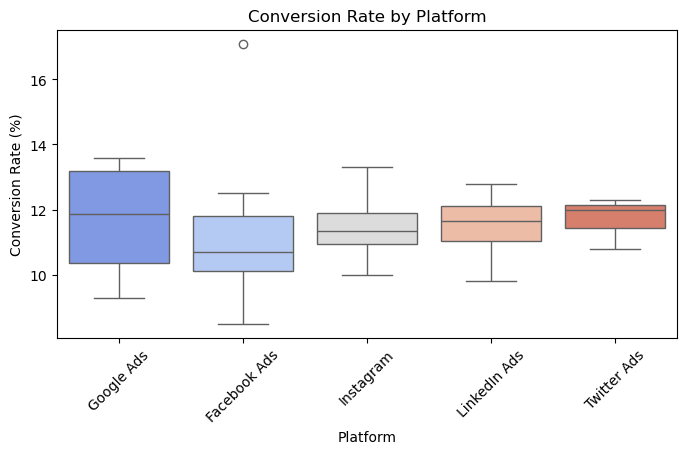

In [101]:
plt.figure(figsize=(8, 4))
ax = sns.boxplot(x=df["Platform"], y=df["Conversion_Rate (%)"], palette="coolwarm")
plt.title("Conversion Rate by Platform")
plt.xlabel("Platform")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.show()


/var/folders/pr/b64y09v502v7b2vyg3cb3xg00000gn/T/ipykernel_4739/550203067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df["Platform"], y=df["ROI (%)"], palette="mako", estimator=sum)


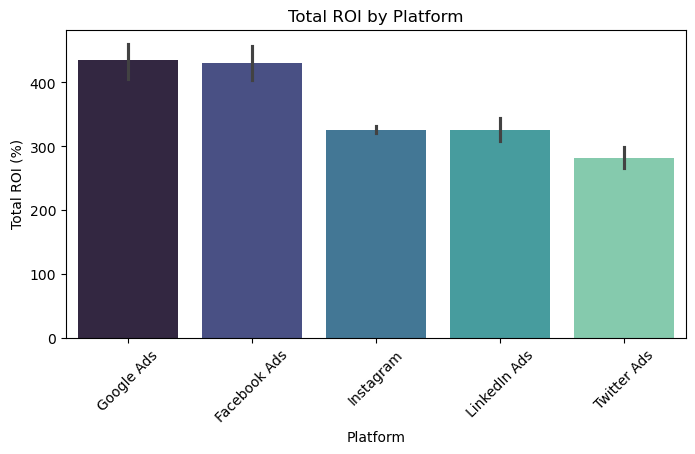

In [99]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=df["Platform"], y=df["ROI (%)"], palette="mako", estimator=sum)
plt.title("Total ROI by Platform")
plt.xlabel("Platform")
plt.ylabel("Total ROI (%)")
plt.xticks(rotation=45)
plt.show()

for bars in ax.containers:
    ax.bar_label(bars)

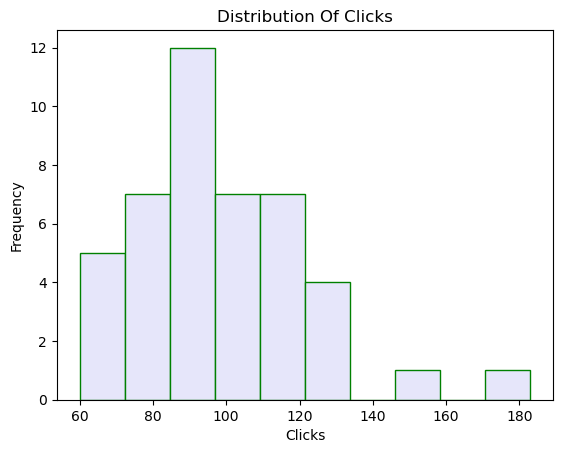

In [93]:
plt.hist(df.Clicks, color = 'lavender', edgecolor = 'green', )
plt.title ("Distribution Of Clicks" )
plt.xlabel("Clicks")
plt.ylabel("Frequency")
plt.show()

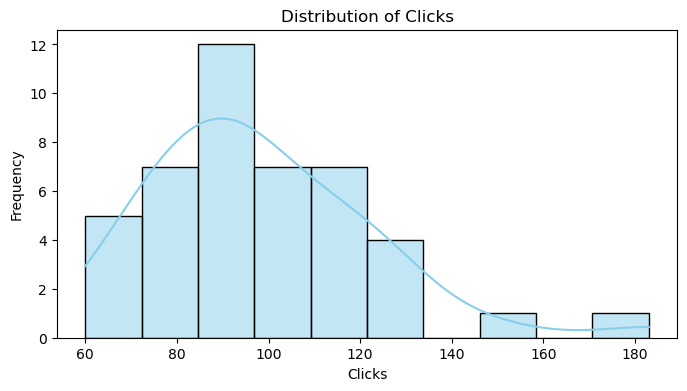

In [103]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Clicks"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Clicks")
plt.xlabel("Clicks")
plt.ylabel("Frequency")
plt.show()

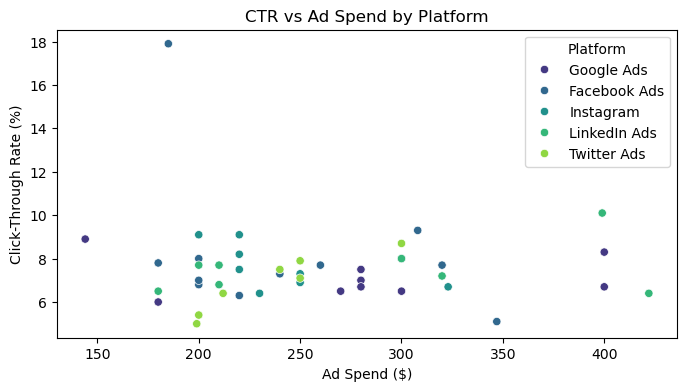

In [105]:
# Scatter plot for CTR vs Ad Spend

plt.figure(figsize=(8, 4))
sns.scatterplot(x=df["Ad_Spend"], y=df["CTR (%)"], hue=df["Platform"], palette="viridis")
plt.title("CTR vs Ad Spend by Platform")
plt.xlabel("Ad Spend ($)")
plt.ylabel("Click-Through Rate (%)")
plt.show()
